# Perceptron algorithm (exercise)

In this exercise, implement a single neuron (perceptron) that classifies two groups of flowers from the Iris dataset.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, a linear discriminant model can be developed to distinguish the species from each other.

For the purpose of this exercise, you will only use two features (sepal length and sepal width) of two species of flowers (Setosa and Versicolor).

In [1]:
# allows inline plotting below each cell
%matplotlib inline

In [2]:
# import necessary libraries 
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
import time

In [56]:
# write a function that plots data and linear classifier


    
    
    

In [58]:
# write a prediction function: 0 for Iris-setosa and 1 for Iris-versicolor
#def guess_flower(SepalLength, SepalWidth) :


In [3]:
### load data ###
iris = pd.read_csv ("iris.csv")

In [4]:
iris.head()
iris2 = iris.drop("Id", axis = 1)
iris2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# we extract the first 100 class labels that correspond to the 50 Iris-Setosa and 50 Iris-Versicolor flowers, respectively# 
y = iris2.iloc[0:100, 4].values
y

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [6]:
#we want to convert the class labels into the two integer class labels 1 (Versicolor) and -1 (Setosa) that we assign to a vector y 
y = np.where(y == 'setosa', 0, 1)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
#Also, we need to extract the first feature column (sepal length) and the second feature column (petal width) of those 100 training samples and assign them to a feature matrix X:

X = iris2.iloc[0:100, [0, 1]].values
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.1],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

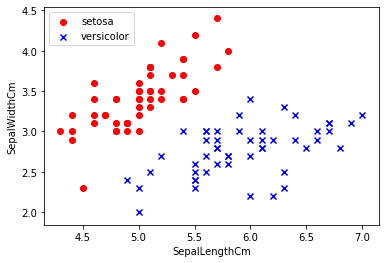

In [8]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend(loc='upper left')
plt.show()

In [9]:
### load data ###


# each point is a tuple (sepal length, sepal width, flower type)
# types: 0 for Setosa & 1 for Versicolor
training_data = [[ 5.1,  3.5,  0 ],
       [ 4.9,  3. ,  0 ],
       [ 4.7,  3.2,  0 ],
       [ 4.6,  3.1,  0 ],
       [ 5. ,  3.6,  0 ],
       [ 5.4,  3.9,  0 ],
       [ 4.6,  3.4,  0 ],
       [ 5. ,  3.4,  0 ],
       [ 4.4,  2.9,  0 ],
       [ 4.9,  3.1,  0 ],
       [ 5.4,  3.7,  0 ],
       [ 4.8,  3.4,  0 ],
       [ 4.8,  3. ,  0 ],
       [ 4.3,  3. ,  0 ],
       [ 5.8,  4. ,  0 ],
       [ 5.7,  4.4,  0 ],
       [ 5.4,  3.9,  0 ],
       [ 5.1,  3.5,  0 ],
       [ 5.7,  3.8,  0 ],
       [ 5.1,  3.8,  0 ],
       [ 7. ,  3.2,  1 ],
       [ 6.4,  3.2,  1 ],
       [ 6.9,  3.1,  1 ],
       [ 5.5,  2.3,  1 ],
       [ 6.5,  2.8,  1 ],
       [ 5.7,  2.8,  1 ],
       [ 6.3,  3.3,  1 ],
       [ 4.9,  2.4,  1 ],
       [ 6.6,  2.9,  1 ],
       [ 5.2,  2.7,  1 ],
       [ 5. ,  2. ,  1 ],
       [ 5.9,  3. ,  1 ],
       [ 6. ,  2.2,  1 ],
       [ 6.1,  2.9,  1 ],
       [ 5.6,  2.9,  1 ],
       [ 6.7,  3.1,  1 ],
       [ 5.6,  3. ,  1 ],
       [ 5.8,  2.7,  1 ],
       [ 6.2,  2.2,  1 ],
       [ 5.6,  2.5,  1 ],
       [ 5.9,  3.2,  1 ],
       [ 6.1,  2.8,  1 ],
       [ 6.3,  2.5,  1 ],
       [ 6.1,  2.8,  1 ],
       [ 6.4,  2.9,  1 ]]

test_data = [[ 5.4,  3.4,  0. ],
           [ 4.6,  3.6,  0. ],
           [ 5.1,  3.3,  0. ],
           [ 4.8,  3.4,  0. ],
           [ 5. ,  3. ,  0. ],
           [ 5. ,  3.4,  0. ],
           [ 5.2,  3.5,  0. ],
           [ 5.2,  3.4,  0. ],
           [ 4.7,  3.2,  0. ],
           [ 4.8,  3.1,  0. ],
           [ 5.4,  3.4,  0. ],
           [ 5.2,  4.1,  0. ],
           [ 5.5,  4.2,  0. ],
           [ 4.9,  3.1,  0. ],
           [ 5. ,  3.2,  0. ],
           [ 5.5,  3.5,  0. ],
           [ 4.9,  3.1,  0. ],
           [ 4.4,  3. ,  0. ],
           [ 5.1,  3.4,  0. ],
           [ 5. ,  3.5,  0. ],
           [ 4.5,  2.3,  0. ],
           [ 4.4,  3.2,  0. ],
           [ 5. ,  3.5,  0. ],
           [ 5.1,  3.8,  0. ],
           [ 4.8,  3. ,  0. ],
           [ 5.1,  3.8,  0. ],
           [ 4.6,  3.2,  0. ],
           [ 5.3,  3.7,  0. ],
           [ 5. ,  3.3,  0. ],
           [ 6.8,  2.8,  1. ],
           [ 6.7,  3. ,  1. ],
           [ 6. ,  2.9,  1. ],
           [ 5.7,  2.6,  1. ],
           [ 5.5,  2.4,  1. ],
           [ 5.5,  2.4,  1. ],
           [ 5.8,  2.7,  1. ],
           [ 6. ,  2.7,  1. ],
           [ 5.4,  3. ,  1. ],
           [ 6. ,  3.4,  1. ],
           [ 6.7,  3.1,  1. ],
           [ 6.3,  2.3,  1. ],
           [ 5.6,  3. ,  1. ],
           [ 5.5,  2.5,  1. ],
           [ 5.5,  2.6,  1. ],
           [ 6.1,  3. ,  1. ],
           [ 5.8,  2.6,  1. ],
           [ 5. ,  2.3,  1. ],
           [ 5.6,  2.7,  1. ],
           [ 5.7,  3. ,  1. ],
           [ 5.7,  2.9,  1. ],
           [ 6.2,  2.9,  1. ],
           [ 5.1,  2.5,  1. ],
           [ 5.7,  2.8,  1. ]]



In [66]:
len(training_data)

45

In [10]:
train = np.array(training_data, dtype=object)

In [11]:
test = np.array(test_data, dtype=object)

In [ ]:
### visualize training data in 2D ###
# x-axis: sepal length, y-axis: sepal width
# use 2 colors to visualize 2 different classes of data 


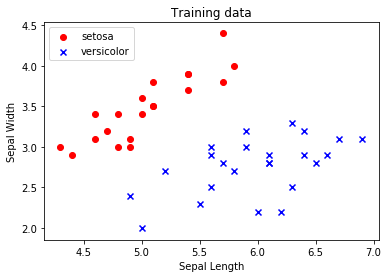

In [12]:
plt.scatter(train[0:20, 0], train[0:20, 1], color='red', marker='o', label='setosa')
plt.scatter(train[21:45, 0], train[21:45, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(loc='upper left')
plt.title('Training data')
plt.show()

In [13]:
x = train
y = test

In [ ]:
"""def sigmoid(x) :
    return 1/(1 + np.exp(-x))

def sigmoid_p(x) :
    return sigmoid(x) * (1-sigmoid(x))"""

In [20]:
### training loop ###

learning_rate = 0.2
costs = []

# initialize weights (set bias to zero)
w1 = np.random.randn()
w2 = np.random.randn()
b = 0



In [154]:
w1,w2

(-1.4880661547087641, -0.1784497623175146)

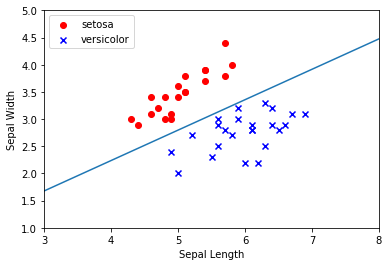

In [21]:
# write a loop of arbitrary n iterations
fig = plt.figure()
for i in range(1000) :
    ri = np.random.randint(len(x))
    point = x[ri]
    x1 = point [0]
    x2 = point [1]
    y = point [2]
    z = x1 * w1 + x2 * w2 + b
    prediction = z
    
    if y == 1 and z < 0:
        w1,w2 = w1 + x1, w2 + x2
    
    if y == 0 and z >= 0:
        w1,w2 = w1 - x1, w2 - x2   
    xx = np.linspace (3,8,100)
    yy= -w1/w2 * xx
    plt.scatter(x[0:20, 0], x[0:20, 1], color='red', marker='o', label='setosa')
    plt.scatter(x[21:45, 0], x[21:45, 1], color='blue', marker='x', label='versicolor')
    plt.plot (xx,yy)
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.legend(loc='upper left')
    plt.axis([3,8,1,5])
    display.clear_output(wait=True)
    time.sleep(0.1)

    plt.show()


In [ ]:
"""# write a loop of arbitrary n iterations
for i in range(10) :
    ri = np.random.randint(len(x))
    point = x[ri]
    
    z = point[0] * w1 + point[1] * w2 + b
    prediction = z
    
    target = point[2]
    
# update the weights by randomly selecting a point from the training dataset


# plot the result after each iteration, and the final result


    
    # cost function
    cost = np.square(prediction - target)
    
    #derivative of the cost function
    dcost_prediction = 2 * (prediction -target)
    dprediction_dz = 1
    
    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_db = 0
    
    # the slope of the cost function
    dcost_dz = dcost_prediction * dprediction_dz
    
    # the slope of the weights & bias
    dcost_dw1 = dcost_dz * dz_dw1
    dcost_dw2 = dcost_dz * dz_dw2
    dcost_db = dcost_dz * dz_db
    
    # Getting new weights & bias
    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    b = b - learning_rate * dcost_db

    
# plot the result after each iteration, and the final result    
    
if i % 100 == 0 :
        cost_sum = 0
        for j in range(len(x)) :
            point = x[ri]
            
            z = point[0] * w1 + point[1] * w2 + b
            prediction = z
            
            target = point[2]
            cost_sum += np.square(prediction - target)
            
        costs.append(cost_sum/len(x))

plt.plot(costs)"""

In [24]:
### evaluation ###

# perform prediction on the test dataset
def guess_flower(SepalLength, SepalWidth) :
    z = SepalLength * w1 + SepalWidth * w2 + b
    if (z<0):
        print('Iris-setosa')
    else:
        print('versicolor')
for i in range(len(test_data)):
    point = test_data[i]
    print(point)   
    guess_flower(point[0], point[1])

[5.4, 3.4, 0.0]
Iris-setosa
[4.6, 3.6, 0.0]
Iris-setosa
[5.1, 3.3, 0.0]
Iris-setosa
[4.8, 3.4, 0.0]
Iris-setosa
[5.0, 3.0, 0.0]
Iris-setosa
[5.0, 3.4, 0.0]
Iris-setosa
[5.2, 3.5, 0.0]
Iris-setosa
[5.2, 3.4, 0.0]
Iris-setosa
[4.7, 3.2, 0.0]
Iris-setosa
[4.8, 3.1, 0.0]
Iris-setosa
[5.4, 3.4, 0.0]
Iris-setosa
[5.2, 4.1, 0.0]
Iris-setosa
[5.5, 4.2, 0.0]
Iris-setosa
[4.9, 3.1, 0.0]
Iris-setosa
[5.0, 3.2, 0.0]
Iris-setosa
[5.5, 3.5, 0.0]
Iris-setosa
[4.9, 3.1, 0.0]
Iris-setosa
[4.4, 3.0, 0.0]
Iris-setosa
[5.1, 3.4, 0.0]
Iris-setosa
[5.0, 3.5, 0.0]
Iris-setosa
[4.5, 2.3, 0.0]
versicolor
[4.4, 3.2, 0.0]
Iris-setosa
[5.0, 3.5, 0.0]
Iris-setosa
[5.1, 3.8, 0.0]
Iris-setosa
[4.8, 3.0, 0.0]
Iris-setosa
[5.1, 3.8, 0.0]
Iris-setosa
[4.6, 3.2, 0.0]
Iris-setosa
[5.3, 3.7, 0.0]
Iris-setosa
[5.0, 3.3, 0.0]
Iris-setosa
[6.8, 2.8, 1.0]
versicolor
[6.7, 3.0, 1.0]
versicolor
[6.0, 2.9, 1.0]
versicolor
[5.7, 2.6, 1.0]
versicolor
[5.5, 2.4, 1.0]
versicolor
[5.5, 2.4, 1.0]
versicolor
[5.8, 2.7, 1.0]
versicolor


ValueError: x and y must have same first dimension, but have shapes (100,) and (45, 3)

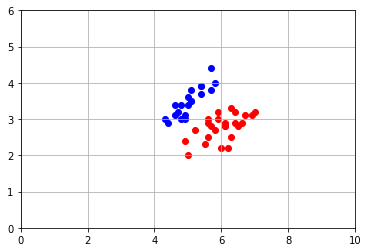

In [28]:
### plot the evaluation result ###
def plot_border(w1, b, data, fig):
    
    plt.axis([0, 10, 0, 6])
    plt.grid()
    
    # scatter data
    for i in range(len(x)) :
        point = x[i]
        color = "r"
        if point[2] == 0 :
            color = "b"
        plt.scatter(point[0], point[1], c=color)

    # separation line
    k = np.linspace(0, 10, 100)
    plt.plot(k, w1*x+b, '-g', label='y=w1*x+b')
    plt.show()
    
fig2 = plt.figure()
plot_border(-w1/w2, -b/w2, y, fig2)